Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


/home/micuks/.local/lib/python3.8/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


cross_entropy error: 2.146888
cross_entropy error: 0.51764154
cross_entropy error: 0.37975776
cross_entropy error: 0.31822577
cross_entropy error: 0.39690536
cross_entropy error: 0.43364078
cross_entropy error: 0.26607633
cross_entropy error: 0.44959247
cross_entropy error: 0.29204315
cross_entropy error: 0.26982442
test accuracy:  0.9098
Prediction :  [7]


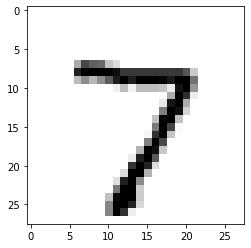

In [5]:

"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
# part1
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

# solve the problem of AttributeError: module 'tensorflow' has no attribute 'placeholder'
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
# import tensorflow as tf

# 载入数据
mnist = input_data.read_data_sets("/tmp/tensorflow/mnist/input_data", one_hot=True)

# 构建单层神经网络
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# 定义损失函数和优化器
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# 注意learning_rate
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# 训练模型:range内迭代次数
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if i%100==0:
        print("cross_entropy error:",sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys}))

# 测试训练好的模型
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("test accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

# part2 ：选择图片测试
# 第几张图片？
p = 0

s = sess.run(y,feed_dict={x: mnist.test.images[p].reshape(1,784)})
print("Prediction : ",sess.run(tf.argmax(s, 1)))

#显示图片
plt.imshow(mnist.test.images[p].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
cross_entropy error: 2.1099966
cross_entropy error: 0.57269764
cross_entropy error: 0.5200922
cross_entropy error: 0.48196775
cross_entropy error: 0.45188934
cross_entropy error: 0.37588012
cross_entropy error: 0.39298666
cross_entropy error: 0.33026522
cross_entropy error: 0.5479697
cross_entropy error: 0.39673337
test accuracy:  0.9093
Prediction :  [7]


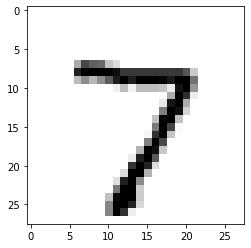

Prediction :  [2]


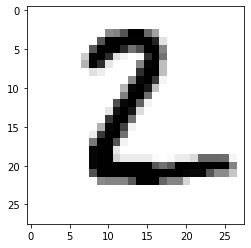

Prediction :  [1]


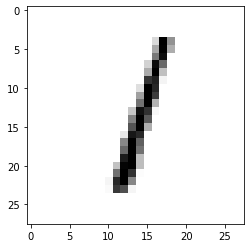

Prediction :  [0]


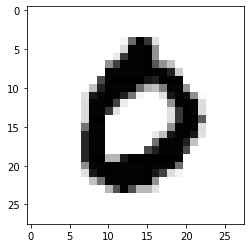

Prediction :  [4]


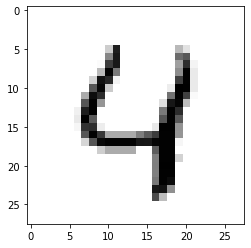

Prediction :  [1]


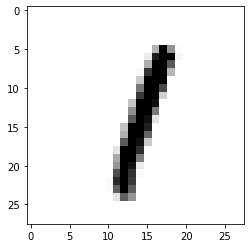

Prediction :  [4]


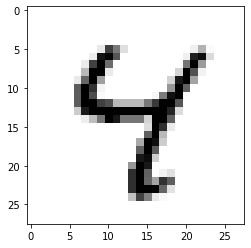

Prediction :  [9]


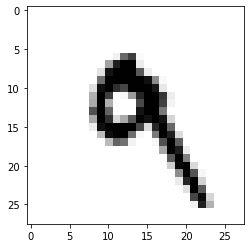

Prediction :  [6]


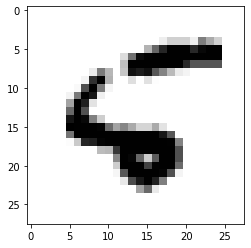

In [11]:

"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
# part1
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

# # solve the problem of AttributeError: module 'tensorflow' has no attribute 'placeholder'
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() 

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import tensorflow as tf

# 载入数据
mnist = input_data.read_data_sets("/tmp/tensorflow/mnist/input_data", one_hot=True)

# 构建单层神经网络
x = tf.compat.v1.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# 定义损失函数和优化器
y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(input_tensor=tf.nn.softmax_cross_entropy_with_logits(labels=tf.stop_gradient(y_), logits=y))
# 注意learning_rate
train_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cross_entropy)

sess = tf.compat.v1.InteractiveSession()
tf.compat.v1.global_variables_initializer().run()
# 训练模型:range内迭代次数
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if i%100==0:
        print("cross_entropy error:",sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys}))

# 测试训练好的模型
correct_prediction = tf.equal(tf.argmax(input=y, axis=1), tf.argmax(input=y_, axis=1))
accuracy = tf.reduce_mean(input_tensor=tf.cast(correct_prediction, tf.float32))
print("test accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

# part2 ：选择图片测试
# 第几张图片？
p=0
for p in range(0,9):
    s = sess.run(y,feed_dict={x: mnist.test.images[p].reshape(1,784)})
    print("Prediction : ",sess.run(tf.argmax(input=s, axis=1)))

    #显示图片
    plt.imshow(mnist.test.images[p].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

Prediction :  [2]


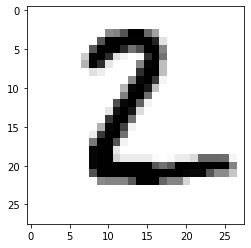

In [7]:
p = 1

s = sess.run(y,feed_dict={x: mnist.test.images[p].reshape(1,784)})
print("Prediction : ",sess.run(tf.argmax(input=s, axis=1)))

#显示图片
plt.imshow(mnist.test.images[p].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()